In [ ]:
#mounting drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#cd datasets/flowers dataset vitra xireko

In [ ]:
!cd drive/MyDrive/FYP/Dataset/flowers

In [ ]:
#Explore the directory
import os
os.listdir()

['.config', 'drive', 'sample_data']

importing necessary libraries
pandas and numpy for maths
matplot for plotting
random for random numbers
seaborn for style while plotting
labelencoder for labeling


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn
import cv2
import random
import random as rn

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import tensorflow as tf
import keras
from keras.utils.np_utils import to_categorical
from tensorflow.keras.optimizers import RMSprop
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
import os
base_path='/content/drive/MyDrive/FYP/Dataset/flowers/'
datas=os.listdir("../content/drive/MyDrive/FYP/Dataset/flowers")
print(datas) #listing files in the directry

['rose', 'dandelion', 'sunflower', 'daisy', 'tulip']


putting the length of the particular directory into l1,l2,l3,l4, and l5

In [ ]:
l1 = len(os.listdir("/content/drive/MyDrive/FYP/Dataset/flowers/daisy"))
l2 = len(os.listdir("/content/drive/MyDrive/FYP/Dataset/flowers/rose"))
l3 = len(os.listdir("/content/drive/MyDrive/FYP/Dataset/flowers/dandelion"))
l4 = len(os.listdir("/content/drive/MyDrive/FYP/Dataset/flowers/sunflower"))
l5 = len(os.listdir("/content/drive/MyDrive/FYP/Dataset/flowers/tulip"))

plotting

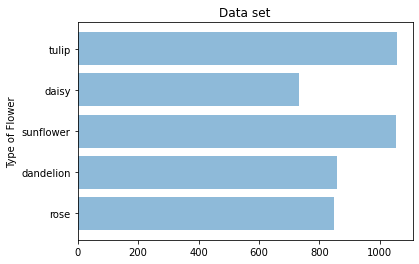

In [ ]:
y_pos = np.arange(len(datas))
performance = [l1,l2,l3,l4,l5]

plt.barh(y_pos,performance, align='center', alpha=0.5)
plt.yticks(y_pos, datas)
plt.ylabel('Type of Flower')
plt.title('Data set')

plt.show()

giving condition if dataset name endswith jpg cv2 identify object

In [ ]:
size = 128,128
image_train=[]
image_labels=[]
image_names=[]

for data in datas:
    for each in os.listdir(os.path.join(base_path,data)):
        if each.endswith('jpg'):
            image_names.append(os.path.join(base_path,data,each))
            image_labels.append(data)
            img=cv2.imread(os.path.join(base_path,data,each))
            img_in=cv2.resize(img,size)
            image_train.append(img_in)
        else:
            continue

Random suffling the dataset

In [ ]:
union_list=list(zip(image_train,image_labels))
random.shuffle(union_list)
train,labels=zip(*union_list)
X=np.array(train)
Y=np.array(labels)
X=X/255.0

using labelencoder to label the dataset

In [ ]:
le=LabelEncoder()
Y=le.fit_transform(Y)
Y=to_categorical(Y,num_classes=5)
classNames = ["daisy","dandelion", "rose","sunflower","tulip"]

assigning the train and test data with the test size of 0.3 i.e 70:30 %

In [ ]:
X_train,X_val,Y_train,Y_val=train_test_split(X,Y,test_size=0.3)

unique data count for each directory

In [ ]:
unique, counts = np.unique(Y_train.argmax(axis=1), return_counts=True)
uniqueVal, countsVal = np.unique(Y_val.argmax(axis=1), return_counts=True)
dict(zip(unique, counts))

{0: 581, 1: 725, 2: 580, 3: 516, 4: 780}

In [ ]:
dict(zip(uniqueVal, countsVal))

{0: 266, 1: 328, 2: 278, 3: 217, 4: 275}

plotting 

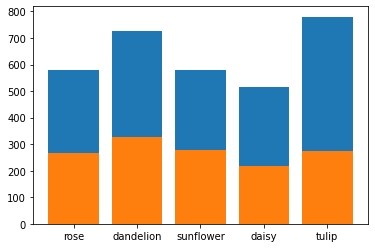

In [ ]:
plt.bar(datas, counts)
plt.bar(datas, countsVal)
plt.show()

visualizing the dataset image

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


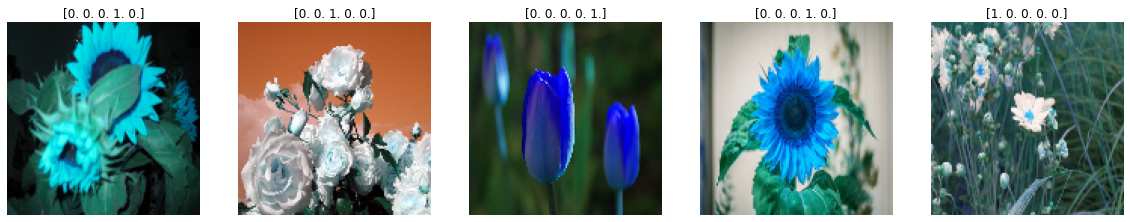

In [ ]:
plt.figure(figsize = (20,20))
for i in range(5):
    img = X_train[100*i]
    plt.subplot(1,5,i+1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(Y_train[100*i])
plt.show()

5 CNN layers 
Using input shape 128,128,3
for activation function relu is used
kernal size 3,3
strides 2,2

In [ ]:
from tensorflow.keras.layers import BatchNormalization
model = Sequential()
# 1st Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=(3,3),padding="Same",activation="relu" , input_shape = (128,128,3)))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
# 2nd Convolutional Layer
model.add(Conv2D(filters=128, kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
# 3rd Convolutional Layer
model.add(Conv2D(filters=128, kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
# 4th Convolutional Layer
model.add(Conv2D(filters=256,kernel_size = (3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
# 5th Convolutional Layer
model.add(Conv2D(filters=512,kernel_size = (3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(1024,activation="relu"))
model.add(Dropout(0.5))
model.add(BatchNormalization())
# Add output layer
model.add(Dense(5,activation="softmax"))


summary of CNN model

In [ ]:
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 64)       256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 64, 64, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 128)      0

compiling model with adam as an optimizer and categorical_crossentropy as a loss function

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy']) #compile model

pre-processing data 

In [ ]:

batch_size = 30
datagen = ImageDataGenerator(
    featurewise_center=False,  
    samplewise_center=False, 
    featurewise_std_normalization=False,  
    samplewise_std_normalization=False,  
    rotation_range=60,  
    zoom_range = 0.1,  
    width_shift_range=0.1,  
    height_shift_range=0.1,
    shear_range=0.1,
    fill_mode = "reflect"
    ) 
datagen.fit(X_train)

training the compiled model with epochs 30 

In [ ]:
history = model.fit_generator(datagen.flow(X_train   ,Y_train,batch_size=batch_size),
                              epochs= 30,validation_data=(X_val,Y_val),
                              steps_per_epoch=X_train.shape[0] // batch_size,validation_steps = 20
                              )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/30
106/106 [==============================] - 35s 219ms/step - loss: 1.7021 - accuracy: 0.4267 - val_loss: 2.6061 - val_accuracy: 0.2405
Epoch 2/30
106/106 [==============================] - 19s 177ms/step - loss: 1.3134 - accuracy: 0.5136 - val_loss: 3.1303 - val_accuracy: 0.2405
Epoch 3/30
106/106 [==============================] - 18s 172ms/step - loss: 1.2090 - accuracy: 0.5444 - val_loss: 3.8225 - val_accuracy: 0.2405
Epoch 4/30
106/106 [==============================] - 18s 172ms/step - loss: 1.0501 - accuracy: 0.5977 - val_loss: 1.7664 - val_accuracy: 0.3402
Epoch 5/30
106/106 [==============================] - 19s 176ms/step - loss: 1.0175 - accuracy: 0.6031 - val_loss: 1.5808 - val_accuracy: 0.3768
Epoch 6/30
106/106 [==============================] - 18s 173ms/step - loss: 0.9751 - accuracy: 0.6174 - val_loss: 1.4909 - val_accuracy: 0.4391
Epoch 7/30
106/106 [==============================] - 18s 172ms/step - loss: 0.9004 - accuracy: 0.6434 - val_loss: 0.8849 - val_ac

saving the best model

In [ ]:
model.save("classification4.h5")
path= '/content/drive/MyDrive/Classification_v4.h5'
model.save('path')

INFO:tensorflow:Assets written to: path/assets


plotting accuracy and loss graph

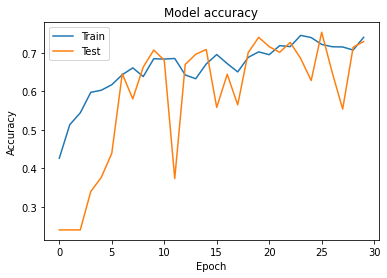

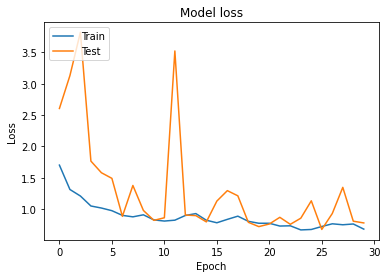

In [ ]:
import matplotlib.pyplot as plt

# training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

loading the model for testing

In [ ]:
import numpy as np
import cv2
from keras.preprocessing import image
from keras.models import load_model
model= load_model('path')
def predict_one_image(img, model):
  img = cv2.resize(img, (128, 128), interpolation = cv2.INTER_CUBIC)
  img = np.reshape(img, (1, 128, 128, 3))
  img = img/255.
  pred = model.predict(img)
  class_num = np.argmax(pred)
  return class_num, np.max(pred)

testing the image

tulip 68%


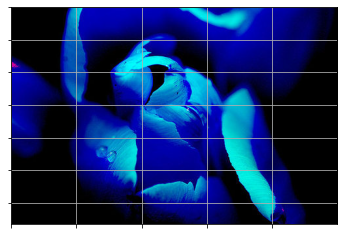

In [ ]:
import cv2
import os
from matplotlib import pyplot as plt
datas=os.listdir("../content/drive/MyDrive/FYP/Dataset/flowers")
test_img = cv2.imread('/content/drive/MyDrive/FYP/Dataset/flowers/tulip/10791227_7168491604.jpg')
pred, probability = predict_one_image(test_img,model)
print('%s %d%%' % (datas[pred], round(probability, 2) * 100))
_, ax = plt.subplots(1)
plt.imshow(test_img)


# Turn off tick labels
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.grid('off')
plt.show()

confusion matrix

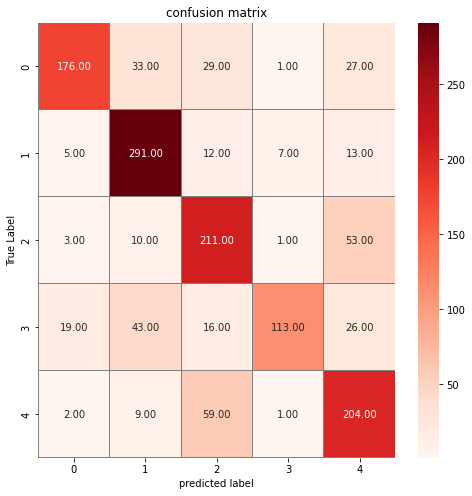

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
Y_pred = model.predict(X_val)
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_true = np.argmax(Y_val,axis = 1)
confusion_mtx = confusion_matrix(Y_true,Y_pred_classes)
f,ax = plt.subplots(figsize = (8,8))
sns.heatmap(confusion_mtx,annot=True,linewidths = 0.01,cmap="Reds",
            linecolor = "gray",fmt = ".2f",ax=ax
            )
plt.xlabel("predicted label")
plt.ylabel("True Label")
plt.title("confusion matrix")
plt.show()